In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("seattle-weather.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
df['date'] = pd.to_datetime(df['date']) #Convert the 'date_column' to datetime format
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['month'] = df['date'].dt.month.map(month_names)  #Create a new column with only the month

In [9]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,January
1,2012-01-02,10.9,10.6,2.8,4.5,rain,January
2,2012-01-03,0.8,11.7,7.2,2.3,rain,January
3,2012-01-04,20.3,12.2,5.6,4.7,rain,January
4,2012-01-05,1.3,8.9,2.8,6.1,rain,January


In [12]:
# Specify the desired order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [19]:
# Convert month column to categorical datatype with specified order
df['month'] = pd.Categorical(df['month'], categories=months_order)

In [25]:
monthly_avg_max_temp = df.groupby('month', observed=False)['temp_max'].mean()

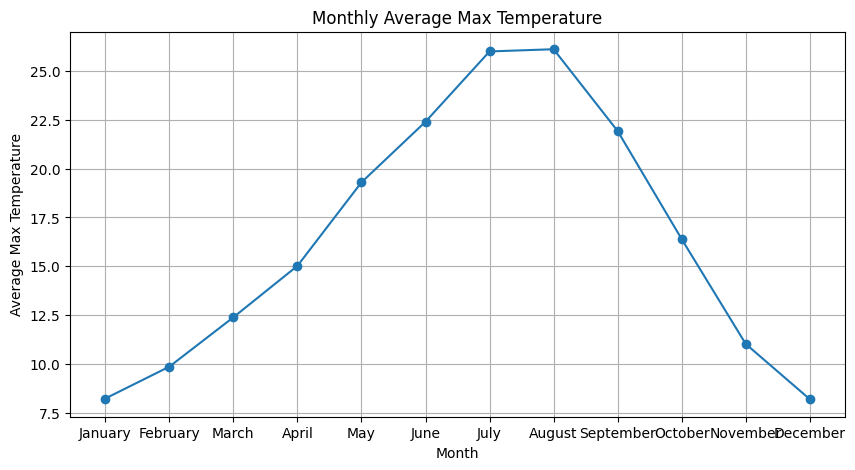

In [26]:
plt.figure(figsize=(10,5))
plt.plot(monthly_avg_max_temp.index,monthly_avg_max_temp.values,marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()

In [28]:
monthly_avg_rainfall=df.groupby('month',observed=False)['precipitation'].mean()

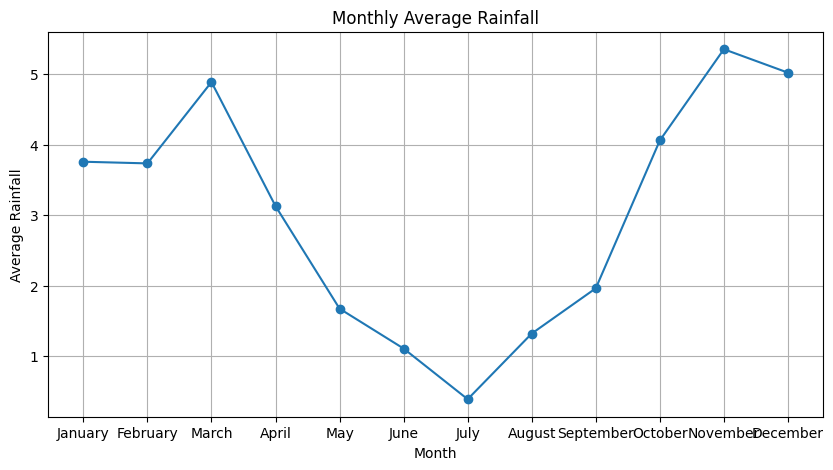

In [29]:
plt.figure(figsize=(10,5))
plt.plot(monthly_avg_rainfall.index,monthly_avg_rainfall.values,marker='o')
plt.xlabel('Month')
plt.ylabel('Average Rainfall')
plt.title('Monthly Average Rainfall')
plt.grid(True)
plt.show()

In [47]:
df["Min+Max Temp"]=df["temp_max"]+df["temp_min"]
average_Temp = df['Min+Max Temp']/2
df['avg_temp'] = average_Temp
df.drop(columns=["Avg_Temp", "Min+Max Temp"], inplace=True)

In [48]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,month,avg_temp
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,January,8.90
1,2012-01-02,10.9,10.6,2.8,4.5,rain,January,6.70
2,2012-01-03,0.8,11.7,7.2,2.3,rain,January,9.45
3,2012-01-04,20.3,12.2,5.6,4.7,rain,January,8.90
4,2012-01-05,1.3,8.9,2.8,6.1,rain,January,5.85


In [49]:
#Apply Linear Regression to predict Rainfall considering max_temp and min_temp
X=df[["avg_temp"]]
y=df["precipitation"]

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

Mean Squared Error for Rainfall Prediction: 37.2473770641328


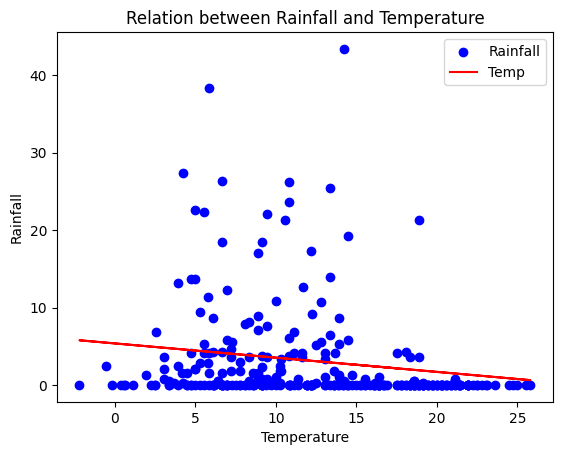

In [53]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color="blue", label="Rainfall")
plt.plot(X_test, y_pred, color="red", label="Temp")
plt.xlabel("Temperature")
plt.ylabel("Rainfall")
plt.title("Relation between Rainfall and Temperature")
plt.legend()  # Adding legend based on labels
plt.show()


In [55]:
#From above it is clear that when temp. increases then rainfall decreases. from above it is clear that there is negative relation between rainfall and temperature.

In [61]:
highest_rainfall_month = monthly_avg_rainfall.idxmax()
lowest_rainfall_month = monthly_avg_rainfall.idxmin()
print(f"Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}")


Highest rainfall month: November, Lowest rainfall month: July


In [62]:
#Now analyse the rainfall according to year

In [63]:
df["year"]=df["date"].dt.year

In [64]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,month,avg_temp,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,January,8.90,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,January,6.70,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,January,9.45,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,January,8.90,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,January,5.85,2012


In [70]:
avg_rainfall_acc_year=df.groupby("year")["precipitation"].mean()

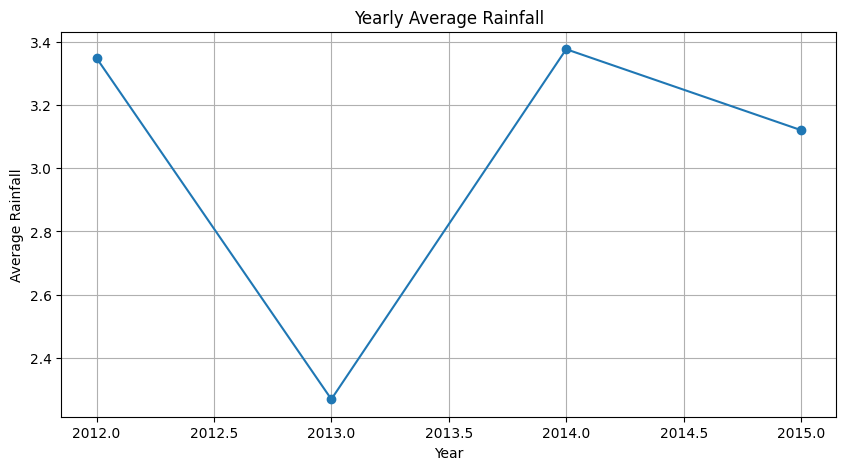

In [71]:
plt.figure(figsize=(10,5))
plt.plot(avg_rainfall_acc_year.index,avg_rainfall_acc_year.values,marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rainfall')
plt.title('Yearly Average Rainfall')
plt.grid(True)
plt.show()